
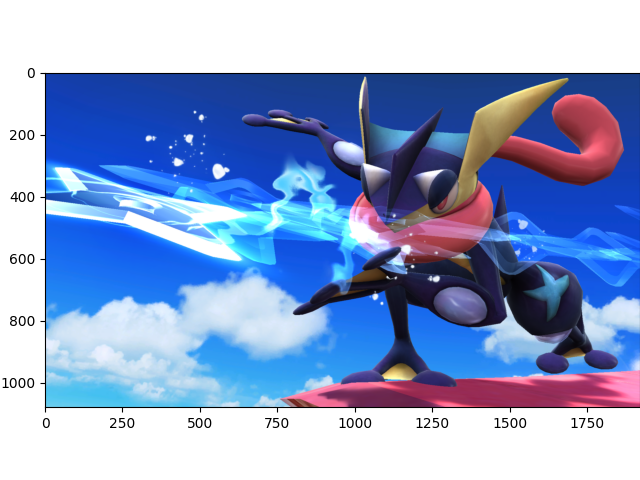

In [87]:
import torchOptics.optics as tt
import warnings 
import torch.nn as nn
import torch
from torchvision.utils import save_image
warnings.filterwarnings('ignore') ## ignore warnings
meta = {'wl' : (638e-9, 515e-9, 450e-9), 'dx':(6.3e-6, 6.3e-6)}
timg = tt.imread('dataset/pokemon.png', meta = meta)
field = timg.clone()

tt.show(field)

In [179]:
# from torch.autograd import Variable
#random continuos image
image_num = 10

output = tt.Tensor(torch.rand(image_num, 3, field.size()[-2], field.size()[-1])-0.5, meta = meta)
# output = Variable(output)
output = output.to('cuda')

output.requires_grad = True
optimizer = torch.optim.Adam([output], lr = 0.01)
criterion = nn.MSELoss()

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    
    mean = torch.mean(output, dim = 1, keepdim = True)
    
    # with torch.no_grad():
    # binary = torch.sigmoid(1000*mean)
    # sim = tt.simulate(binary, 20e-3).abs()**2
    # sum_sim = torch.sum(sim, dim = 0)

    sim = tt.simulate(output, 20e-3).abs()**2
    sum_sim = torch.sum(sim, dim = 0)
    
    loss = criterion(sum_sim, timg)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(loss)


0.1629142016172409
0.008368494920432568
0.0010863440111279488
0.00020198374113533646
5.7535267842467874e-05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


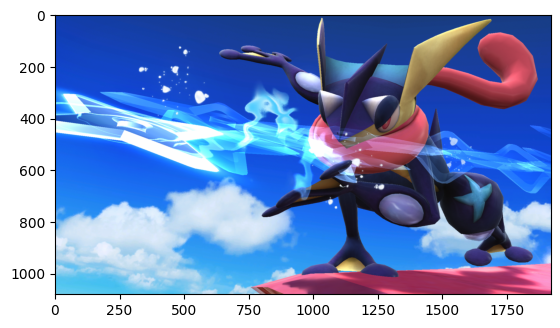

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [180]:
sum_sim

In [181]:
# from torch.autograd import Variable
#random continuos image
image_num = 5
z = 20e-2
output = tt.Tensor(torch.rand(image_num, 3, field.size()[-2], field.size()[-1]), meta = meta)
# output = Variable(output)
output = output.to('cuda')

amp = output.abs()
ph = torch.angle(output)

factor = torch.tensor([10], dtype = torch.float32, device = 'cuda')

amp.requires_grad = True
# divide_factor.requires_grad = True
# output.requires_grad = True
optimizer = torch.optim.Adam([amp, factor], lr = 0.001)
criterion = nn.MSELoss()

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    
    # mean = torch.mean(output, dim = 1, keepdim = True)
    
    # with torch.no_grad():
    # binary = torch.sigmoid(1000*mean)
    # sim = tt.simulate(binary, 20e-3).abs()**2
    # sum_sim = torch.sum(sim, dim = 0)
    # concat = amp * torch.exp(1j*ph)
    
    mean = torch.mean(amp-0.5, dim = 1, keepdim = True)
    binary = torch.sigmoid(factor * mean)
    concat = binary * torch.exp(1j*ph)

    sim = tt.simulate(concat, z).abs()**2
    sum_sim = torch.sum(sim, dim = 0) / image_num
    
    loss = criterion(sum_sim, timg)
    loss.backward()
    optimizer.step()
    if epoch % (epochs//10) == 0:
        print(loss)
continuos_ = output
binary_ = binary.clone()
binary_[binary >= 0.5] = 1
binary_[binary < 0.5] = 0
reconstructed_image = torch.sum(tt.simulate(binary_ * torch.exp(1j*ph), z), dim = 0) / 5

0.15635250508785248
0.10453790426254272
0.07536996901035309
0.06305557489395142
0.05790656805038452
0.05509142577648163
0.05307944864034653
0.051420509815216064
0.04996713623404503
0.04866243153810501


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



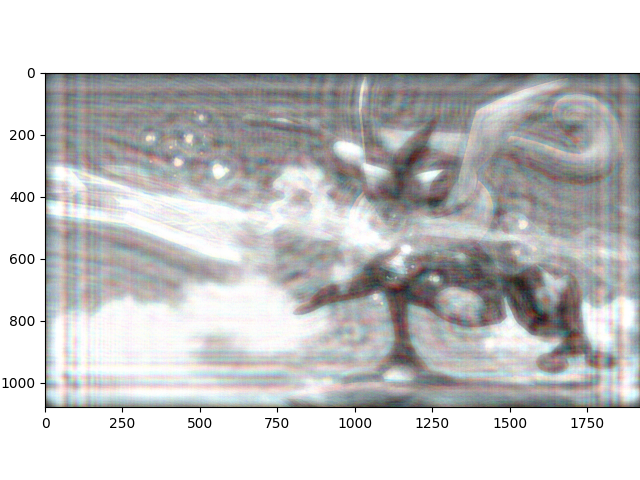

In [182]:
# reconstructed_image = torch.sum(tt.simulate(binary_ * torch.exp(1j*ph), z), dim = 0) / 5
tt.show(reconstructed_image)

In [183]:
print(factor)

tensor([10.], device='cuda:0')


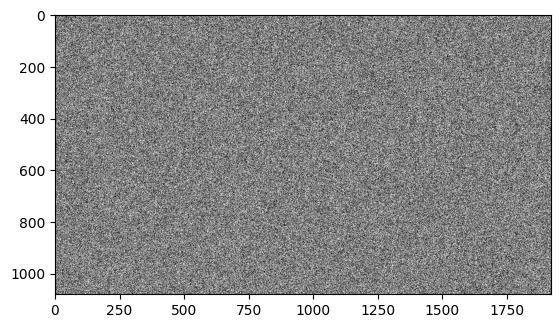

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [165]:
binary_[0]

In [102]:
output = tt.Tensor(torch.rand(image_num, 3, field.size()[-2], field.size()[-1])-0.5, meta = meta)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


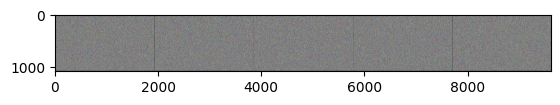

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [103]:
torch.angle(output)

In [105]:
output.dtype

torch.float32

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



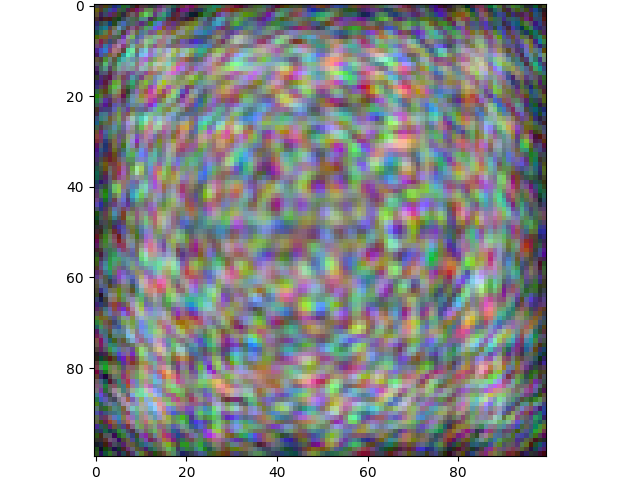

In [176]:
test = tt.Tensor(torch.rand(100,100), meta = meta)
test[test > 0.5] = 1
test[test <= 0.5] = 0
sim = tt.simulate(test, 20e-3)
tt.show(sim)